***Nike Stock Price Analysis and Prediction***

---






Да се најдат податоците за цената на акциите и ESG score на компанијата Nike за изминатите 4 години. Потоа, да се проучат податоците со користење на tsfresh и истите да се објаснат. Да се направи benchmark на најмалку 3 модели за предикција на цена на акциите на компанијата имајќи ги предвид горенаведените податоци.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [4]:
pip install tsfresh


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 6.7 MB/s eta 0:00:00


## *Collecting data*





---


In [5]:
data = pd.read_csv("/content/drive/MyDrive/VNP_2023/NIKE stock.csv")


In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-02,0.179688,0.183594,0.179688,0.179688,0.000004,100710400
1,1980-12-03,0.177734,0.177734,0.175781,0.175781,0.000004,25177600
2,1980-12-04,0.181641,0.183594,0.181641,0.181641,0.000004,22694400
3,1980-12-05,0.175781,0.175781,0.171875,0.171875,0.000004,7590400
4,1980-12-08,0.164063,0.164063,0.162109,0.162109,0.000003,5414400
...,...,...,...,...,...,...,...
10759,2023-08-07,109.870003,110.940002,109.180000,110.480003,110.480003,4887300
10760,2023-08-08,109.629997,109.889999,107.349998,109.690002,109.690002,5851900
10761,2023-08-09,109.790001,110.019997,108.300003,109.690002,109.690002,4328600
10762,2023-08-10,110.309998,111.949997,108.519997,109.029999,109.029999,7276500


## *Analysis of the data*





---



In [11]:
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-02,0.179688,0.183594,0.179688,0.179688,0.000004,100710400
1,1980-12-03,0.177734,0.177734,0.175781,0.175781,0.000004,25177600
2,1980-12-04,0.181641,0.183594,0.181641,0.181641,0.000004,22694400
3,1980-12-05,0.175781,0.175781,0.171875,0.171875,0.000004,7590400
4,1980-12-08,0.164063,0.164063,0.162109,0.162109,0.000003,5414400


In [12]:
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

Number of rows: 10764
Number of columns: 7


In [13]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [14]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10764.000000,10764.000000,10764.000000,10764.000000,10764.000000,1.076400e+04
mean,24.503373,24.758276,24.247479,24.506790,21.820850,1.167958e+07
std,37.173003,37.545128,36.783677,37.163721,37.303111,1.042981e+07
min,0.107422,0.109375,0.103516,0.107422,0.000002,0.000000e+00
25%,1.441406,1.471680,1.421875,1.445313,0.044605,6.115475e+06
50%,7.062500,7.156250,6.951875,7.050781,2.252938,8.934400e+06
75%,27.068751,27.270624,26.799999,27.028125,22.933410,1.364340e+07
max,176.350006,179.100006,175.500000,177.509995,174.236023,1.574456e+08


## *Preprocessing the data*

---



In [ ]:
data.isnull().sum() #checking for missing values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data['Date']=pd.to_datetime(data['Date'])

In [ ]:
#sorting  by date
data=data.sort_values('Date')


In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.head() #sorted from 1980 to 2023

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-02,0.179688,0.183594,0.179688,0.179688,0.000004,100710400
1,1980-12-03,0.177734,0.177734,0.175781,0.175781,0.000004,25177600
2,1980-12-04,0.181641,0.183594,0.181641,0.181641,0.000004,22694400
3,1980-12-05,0.175781,0.175781,0.171875,0.171875,0.000004,7590400
4,1980-12-08,0.164063,0.164063,0.162109,0.162109,0.000003,5414400


In [ ]:
data_final = data[(data['Date'] > "2019-09-15")].reset_index(drop=True)

In [ ]:
data_final.head() #final version from august 2019 to august 2023

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-16,87.089996,87.820000,86.669998,87.269997,86.394669,4171700
1,2019-09-17,86.769997,87.639999,86.470001,87.589996,86.711464,3248400
2,2019-09-18,87.650002,88.400002,87.209999,88.080002,87.196541,4722200
3,2019-09-19,88.400002,88.720001,87.510002,87.699997,86.820358,4231200
4,2019-09-20,88.000000,88.489998,86.669998,86.680000,85.810593,6991100


## *Visuelization of data*

---

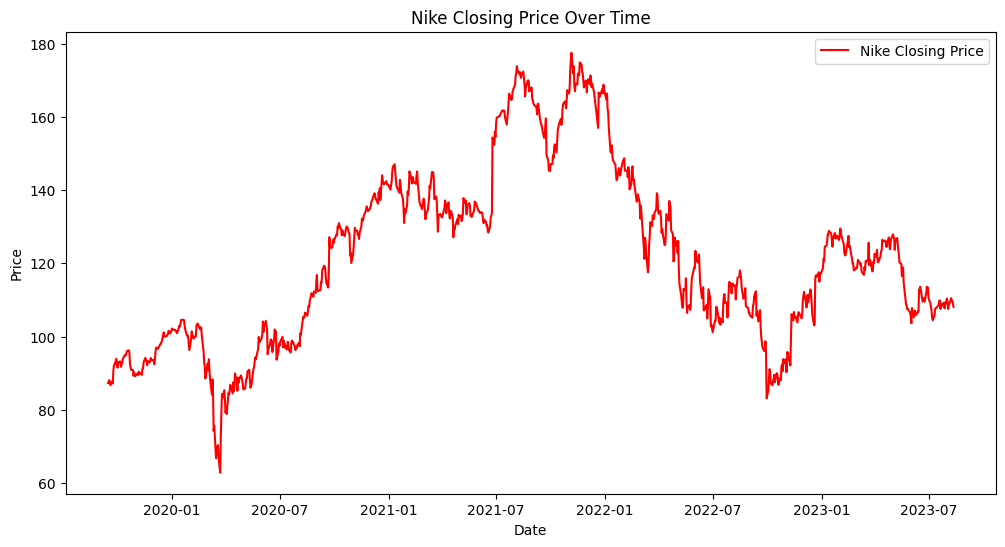

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data_final['Date'], data_final['Close'], label='Nike Closing Price', color='red')
plt.title('Nike Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

<ipython-input-17-f2e1a04a75e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_final.corr()


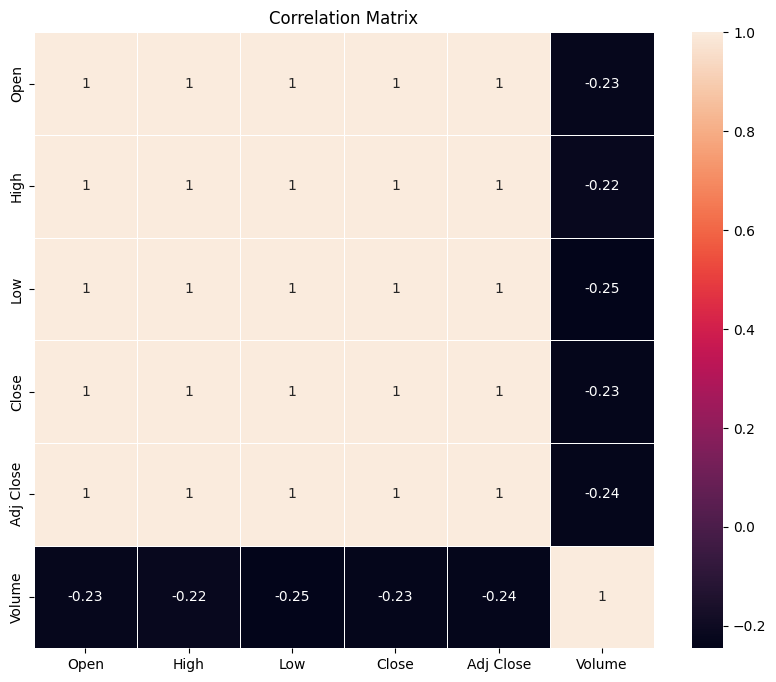

In [ ]:
import seaborn as sns
correlation_matrix = data_final.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## *Benchmark for price prediction - XGBoost & LSTM & Linear Regression*







--> XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/VNP_2023/NIKE stock.csv")

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-02,0.179688,0.183594,0.179688,0.179688,0.000004,100710400
1,1980-12-03,0.177734,0.177734,0.175781,0.175781,0.000004,25177600
2,1980-12-04,0.181641,0.183594,0.181641,0.181641,0.000004,22694400
3,1980-12-05,0.175781,0.175781,0.171875,0.171875,0.000004,7590400
4,1980-12-08,0.164063,0.164063,0.162109,0.162109,0.000003,5414400


In [ ]:
data['Date']=pd.to_datetime(data['Date'])
#sorting  by date
data=data.sort_values('Date')
data = data.reset_index(drop=True)


In [ ]:
df =data[(data['Date'] > "2019-09-15")].reset_index(drop=True)
df.head() #final version from august 2019 to august 2023

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-16,87.089996,87.820000,86.669998,87.269997,86.394669,4171700
1,2019-09-17,86.769997,87.639999,86.470001,87.589996,86.711464,3248400
2,2019-09-18,87.650002,88.400002,87.209999,88.080002,87.196541,4722200
3,2019-09-19,88.400002,88.720001,87.510002,87.699997,86.820358,4231200
4,2019-09-20,88.000000,88.489998,86.669998,86.680000,85.810593,6991100


In [ ]:
features = ['Open', 'High', 'Low', 'Volume']
X = data[features].values
y = data['Close'].values  # Predicting the 'Close' price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = xgb.XGBRegressor(objective ='reg:linear',
    colsample_bytree = 0.3, learning_rate = 0.1,
    max_depth = 10, alpha = 2, n_estimators = 15)
model.fit(X_train, y_train)

[17:30:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=15, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_test, y_pred))))
print("Mean Squared Error : " + str(mean_squared_error(y_pred, y_test)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, y_test))))

Mean Absolute Error : 2.84487894582102
Mean Squared Error : 185.0412354711799
Root Mean Squared Error : 13.602986270344461


In [ ]:
r2_score(y_test, y_pred)

0.8606377764397033

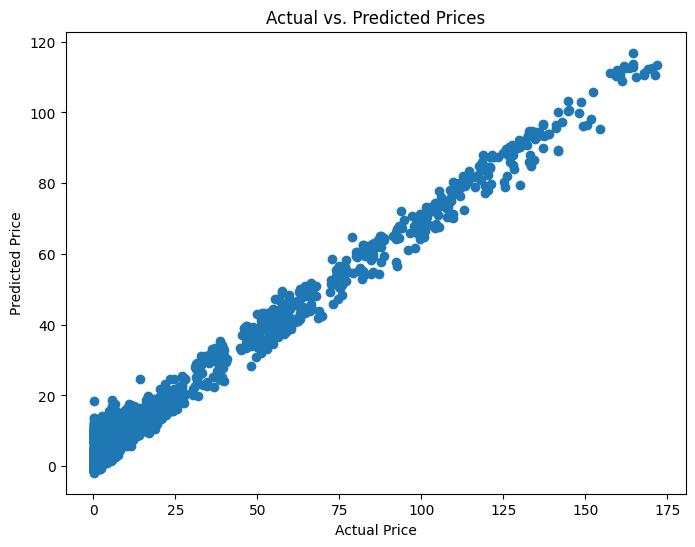

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()

---> LSTM Prediction

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/VNP_2023/NIKE stock.csv")

In [ ]:
data['Date']=pd.to_datetime(data['Date'])
#sorting  by date
data=data.sort_values('Date')

data = data.reset_index(drop=True)


In [ ]:

df =data[(data['Date'] > "2019-09-15")].reset_index(drop=True)
df.head() #final version from august 2019 to august 2023

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-16,87.089996,87.820000,86.669998,87.269997,86.394669,4171700
1,2019-09-17,86.769997,87.639999,86.470001,87.589996,86.711464,3248400
2,2019-09-18,87.650002,88.400002,87.209999,88.080002,87.196541,4722200
3,2019-09-19,88.400002,88.720001,87.510002,87.699997,86.820358,4231200
4,2019-09-20,88.000000,88.489998,86.669998,86.680000,85.810593,6991100


<ipython-input-59-b764711d9f67>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

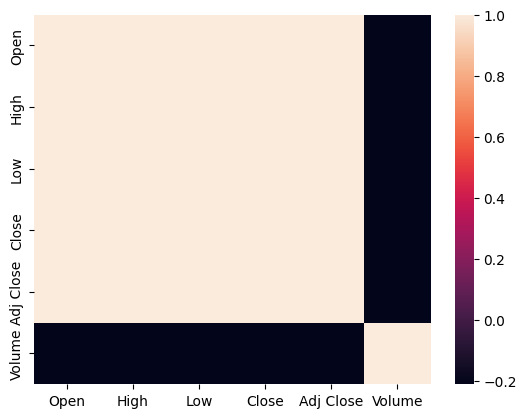

In [ ]:
import seaborn as sns
sns.heatmap(data.corr())

In [ ]:
data=data[['Date','Close']]
data

,Date,Close
0,1980-12-02,0.179688
1,1980-12-03,0.175781
2,1980-12-04,0.181641
3,1980-12-05,0.171875
4,1980-12-08,0.162109
...,...,...
10759,2023-08-07,110.480003
10760,2023-08-08,109.690002
10761,2023-08-09,109.690002
10762,2023-08-10,109.029999


In [ ]:
data.index=data.pop('Date')
data

,Close
Date,
1980-12-02,0.179688
1980-12-03,0.175781
1980-12-04,0.181641
1980-12-05,0.171875
1980-12-08,0.162109
...,...
2023-08-07,110.480003
2023-08-08,109.690002
2023-08-09,109.690002


In [ ]:
matrix = []
for i in range(len(data['Close'])-1, 2, -1):

  day3=data['Close'][i-3]
  day2=data['Close'][i-2]
  day1=data['Close'][i-1]
  matrix.append([data['Close'][i], day1, day2, day3])

matrix

[[108.089996, 109.029999, 109.690002, 109.690002],
 [109.029999, 109.690002, 109.690002, 110.480003],
 [109.690002, 109.690002, 110.480003, 108.809998],
 [109.690002, 110.480003, 108.809998, 108.639999],
 [110.480003, 108.809998, 108.639999, 107.510002],
 [108.809998, 108.639999, 107.510002, 109.400002],
 [108.639999, 107.510002, 109.400002, 110.389999],
 [107.510002, 109.400002, 110.389999, 108.620003],
 [109.400002, 110.389999, 108.620003, 107.669998],
 [110.389999, 108.620003, 107.669998, 109.300003],
 [108.620003, 107.669998, 109.300003, 108.300003],
 [107.669998, 109.300003, 108.300003, 108.769997],
 [109.300003, 108.300003, 108.769997, 109.059998],
 [108.300003, 108.769997, 109.059998, 107.529999],
 [108.769997, 109.059998, 107.529999, 109.879997],
 [109.059998, 107.529999, 109.879997, 109.720001],
 [107.529999, 109.879997, 109.720001, 108.709999],
 [109.879997, 109.720001, 108.709999, 107.949997],
 [109.720001, 108.709999, 107.949997, 107.839996],
 [108.709999, 107.949997, 107.8

In [ ]:
data = pd.DataFrame(matrix,columns=['Close','One day ago','Two days ago','Three days ago'])

In [ ]:
data

,Close,One day ago,Two days ago,Three days ago
0,108.089996,109.029999,109.690002,109.690002
1,109.029999,109.690002,109.690002,110.480003
2,109.690002,109.690002,110.480003,108.809998
3,109.690002,110.480003,108.809998,108.639999
4,110.480003,108.809998,108.639999,107.510002
...,...,...,...,...
10756,0.140625,0.148438,0.158203,0.162109
10757,0.148438,0.158203,0.162109,0.171875
10758,0.158203,0.162109,0.171875,0.181641
10759,0.162109,0.171875,0.181641,0.175781


In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
data = data[:5000]

In [ ]:
test = data[:int(len(data)*0.2)]
train = data[int(len(data)*0.2):]

In [ ]:
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

Y_train = train['Close']
Y_test = test['Close']

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            41600     
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=100, batch_size=16)

Epoch 1/100
200/200 [==============================] - 2s 9ms/step - loss: 0.9180 - mean_absolute_error: 0.5721 - val_loss: 0.7894 - val_mean_absolute_error: 0.7093
Epoch 2/100
200/200 [==============================] - 2s 8ms/step - loss: 0.8009 - mean_absolute_error: 0.5495 - val_loss: 0.7406 - val_mean_absolute_error: 0.6812
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.9654 - mean_absolute_error: 0.5812 - val_loss: 0.6949 - val_mean_absolute_error: 0.6562
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 1.0236 - mean_absolute_error: 0.5930 - val_loss: 0.6530 - val_mean_absolute_error: 0.6326
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 1.0658 - mean_absolute_error: 0.6029 - val_loss: 0.6231 - val_mean_absolute_error: 0.6151
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 1.0859 - mean_absolute_error: 0.6098 - val_loss: 0.5990 - val_mean_absolute_error: 0.6004
Epoch 7/10

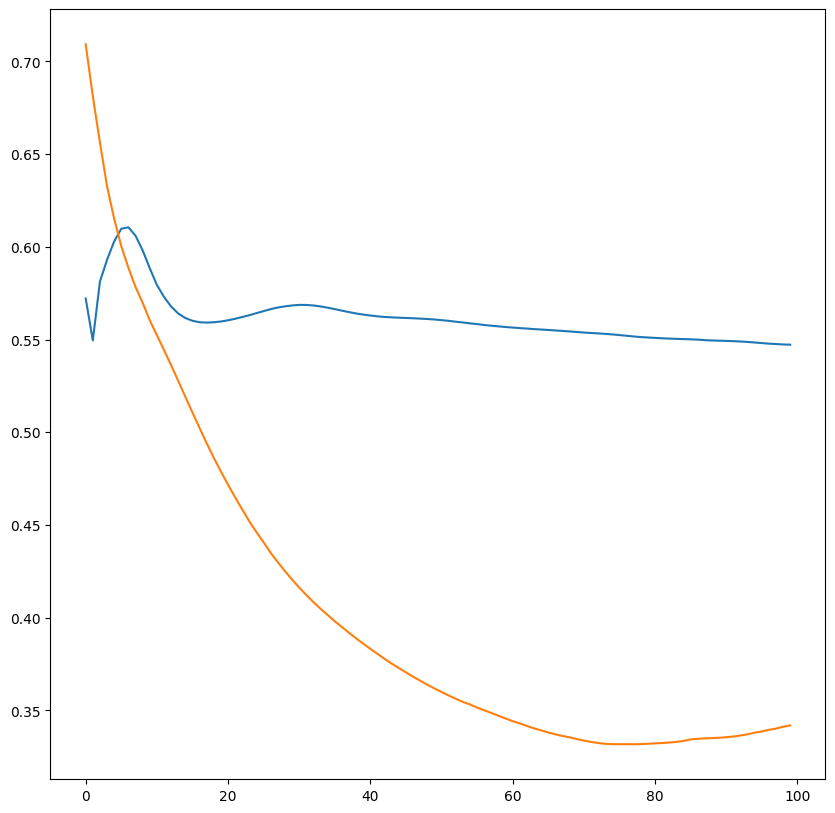

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.9072026915455924

-> Linear Regression


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/VNP_2023/NIKE stock.csv")


In [ ]:
data['Date']=pd.to_datetime(data['Date'])
#sorting  by date
data=data.sort_values('Date')

data = data.reset_index(drop=True)

In [ ]:
df =data[(data['Date'] > "2019-09-15")].reset_index(drop=True)
df.head() #final version from august 2019 to august 2023

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-16,87.089996,87.820000,86.669998,87.269997,86.394669,4171700
1,2019-09-17,86.769997,87.639999,86.470001,87.589996,86.711464,3248400
2,2019-09-18,87.650002,88.400002,87.209999,88.080002,87.196541,4722200
3,2019-09-19,88.400002,88.720001,87.510002,87.699997,86.820358,4231200
4,2019-09-20,88.000000,88.489998,86.669998,86.680000,85.810593,6991100


In [ ]:
features = ['Open', 'High', 'Low', 'Volume']
X = df[features].values
y = df['Close'].values  # Predicting the target column 'Close' price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Initialize the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Calculate MSE, MAE, and R-squared on the test data
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Coefficient of determination:", r2)

Mean Squared Error: 0.7165696159722996
Mean Absolute Error: 0.6307629337038787
Coefficient of determination: 0.9988511887411943


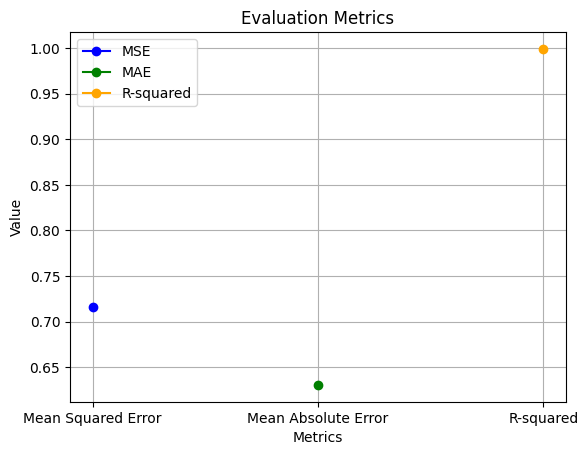

In [ ]:
plt.plot(['Mean Squared Error'], [mse], marker='o', label='MSE', color='blue')

# Line plot for Mean Absolute Error
plt.plot(['Mean Absolute Error'], [mae], marker='o', label='MAE', color='green')

# Line plot for Coefficient of Determination (R-squared)
plt.plot(['R-squared'], [r2], marker='o', label='R-squared', color='orange')

plt.title('Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## *TS Fresh*

---



In [ ]:
from tsfresh import extract_features

## *Analysis of lag features in time series*




---





In [ ]:
# Lag features can capture the influence of past values on current and future values.
from tsfresh.feature_extraction import ComprehensiveFCParameters

# Define extraction settings
extraction_settings = ComprehensiveFCParameters()

# Extract features
extracted_features = extract_features(data_final, column_id='Date', default_fc_parameters=extraction_settings)

Feature Extraction: 100%|██████████| 6888/6888 [04:05<00:00, 28.09it/s]


In [ ]:
extracted_features.head()

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,NumericalDate__fourier_entropy__bins_5,NumericalDate__fourier_entropy__bins_10,NumericalDate__fourier_entropy__bins_100,NumericalDate__permutation_entropy__dimension_3__tau_1,NumericalDate__permutation_entropy__dimension_4__tau_1,NumericalDate__permutation_entropy__dimension_5__tau_1,NumericalDate__permutation_entropy__dimension_6__tau_1,NumericalDate__permutation_entropy__dimension_7__tau_1,NumericalDate__query_similarity_count__query_None__threshold_0.0,NumericalDate__mean_n_absolute_max__number_of_maxima_7
2019-09-16,0.0,0.0,0.0,0.0,87.089996,7584.667403,NaN,NaN,NaN,87.089996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-17,0.0,0.0,0.0,0.0,86.769997,7529.032379,NaN,NaN,NaN,86.769997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-18,0.0,0.0,0.0,0.0,87.650002,7682.522851,NaN,NaN,NaN,87.650002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-19,0.0,0.0,0.0,0.0,88.400002,7814.560354,NaN,NaN,NaN,88.400002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-20,0.0,0.0,0.0,0.0,88.000000,7744.000000,NaN,NaN,NaN,88.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## *Analysis of autocorrelation feature*





In [ ]:
# Autocorrelation measures the correlation between a time series and its lagged values. It helps identify the presence of any predictable patterns in the data
from tsfresh.feature_extraction.feature_calculators import autocorrelation

# Calculate autocorrelation at different lags (for example, lags 1 and 5)
autocorr_lag_1 = autocorrelation(data_final['Close'], lag=1)
autocorr_lag_5 = autocorrelation(data_final['Close'], lag=5)

print("Autocorrelation at Lag 1:", autocorr_lag_1)
print("Autocorrelation at Lag 5:", autocorr_lag_5)

Autocorrelation at Lag 1: 0.9947045243042038
Autocorrelation at Lag 5: 0.9746320778331796


<Figure size 1000x600 with 0 Axes>

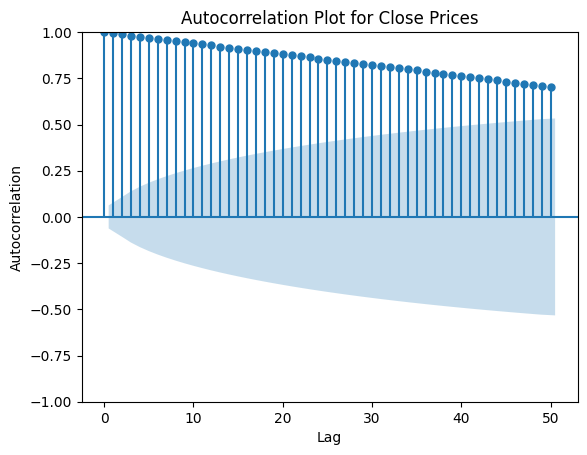

In [ ]:
#plotting autocorrelation lags
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

data_final['Close'] = pd.to_numeric(data_final['Close'], errors='coerce')
data_final['Close'].dropna(inplace=True)

plt.figure(figsize=(10, 6))
plot_acf(data_final['Close'], lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot for Close Prices')
plt.show()

In [ ]:

# Calculate lagged features
lag_1 = data_final['Close'].shift(1)  # Lag 1
lag_5 = data_final['Close'].shift(5)  # Lag 5

# Add lagged features to the dataframe
data_final['Lag_1'] = lag_1
data_final['Lag_5'] = lag_5

# Display the dataframe with lagged features
print(data_final.head())

        Date       Open       High        Low      Close  Adj Close   Volume  \
0 2019-09-16  87.089996  87.820000  86.669998  87.269997  86.394669  4171700   
1 2019-09-17  86.769997  87.639999  86.470001  87.589996  86.711464  3248400   
2 2019-09-18  87.650002  88.400002  87.209999  88.080002  87.196541  4722200   
3 2019-09-19  88.400002  88.720001  87.510002  87.699997  86.820358  4231200   
4 2019-09-20  88.000000  88.489998  86.669998  86.680000  85.810593  6991100   

   NumericalDate      Lag_1  Lag_5  
0              0        NaN    NaN  
1              1  87.269997    NaN  
2              2  87.589996    NaN  
3              3  88.080002    NaN  
4              4  87.699997    NaN  


Lagged features in a time series dataset represent past values of a variable (in this case, stock prices) at different time intervals before the current time point. Think of lagged features as a way to look back in time and include previous data points as features in your analysis. For eg. Lag 1 represents the value of the variable (e.g., stock price) from just one time step before the current time. It's like looking at yesterday's value to understand today's behavior.

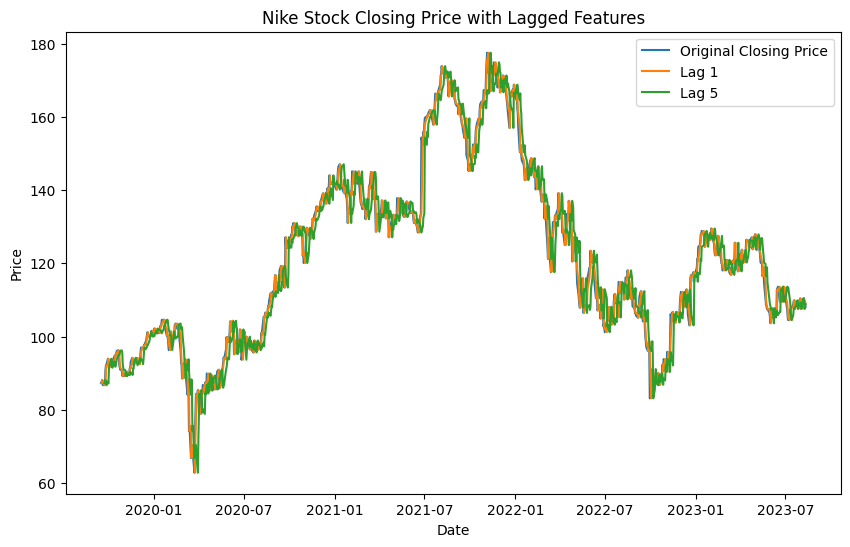

In [ ]:
lag_1 = data_final['Close'].shift(1)
lag_5 = data_final['Close'].shift(5)

# Plot the original closing price and lagged features
plt.figure(figsize=(10, 6))
plt.plot(data_final['Date'], data_final['Close'], label='Original Closing Price')
plt.plot(data_final['Date'], lag_1, label='Lag 1')
plt.plot(data_final['Date'], lag_5, label='Lag 5')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Nike Stock Closing Price with Lagged Features')
plt.legend()
plt.show()